### Content :
### Step 1: Import Libraries and Data
### Step 2: Adress any PII data
### Step 3: Comparing customer behavior in different geographic areas
#### 3.1: Regional segmentation of the data
#### 3.2: Comparing spending habits in different region
### Step 4: Exclusion flag to exclude low-activity customers
### Step 5&6: Create profiling variables and appropriate visualization to show the distribution of profiles
#### 1. Income Profile
#### 2. Age Profile
##### 2.1. Comapring Loyalty in differents age groups
##### 2.2. Comapring Spending in differents age groups
##### 2.3. Comapring order-frequency in differents age groups
#### 3. Number of dependents Profile
<span style="color: red;"> The continuation of this exercise can be found in (4.10 IC Task_part 2) to reduce memory problems.




## Step 1: Import Libraries and Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# assign path
path = r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\07-12-24 Instacart Basket Analysis'

In [3]:
# Import latest dataframe
df_IC = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merged.pkl'))

## Step 2: Adress any PII data

In [4]:
# Display all columns od dataframe
pd.set_option('display.max_columns', None)

In [5]:
df_IC.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prods_price,spending_flag,customer_frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non_frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_IC.shape

(32404859, 33)

The combination of column like first_name, last_name, age, gender,state,number_of_dependents, family_status, income could lead to identification of a single person using external data sources. So,this issue can be addressed by dropping first_name, last_name columns.

In [7]:
# Dropping first_name and last_name columns 
df_IC= df_IC.drop(columns = ['first_name','last_name'])

In [8]:
df_IC.shape

(32404859, 31)

## Step 3: Comparing customer behavior in different geographic areas

### 3.1: Regional segmentation of the data

In [9]:
# Set up region column
result = []
for value in df_IC['state']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [10]:
# Assigning the values in result[] to new column Region
df_IC['region']=result

In [11]:
#Examining Value Counts on 'region'
df_IC['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
#Examining Value Counts on 'region' for each user
df_IC.groupby(['region']).user_id.nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

### 3.2: Comparing spending habits in different regions

In [13]:
crosstab = pd.crosstab (df_IC['region'], df_IC['spending_flag'],dropna = False)

In [14]:
crosstab.to_clipboard()

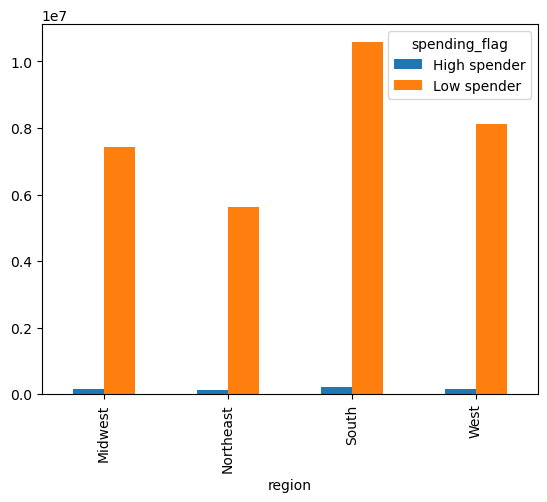

In [15]:
# Bar graph for spending habits by region
bar_reg_spend =  crosstab.plot.bar()

The graph shows that "Low spenders" dominate in all regions (Midwest, Northeast, South, West), with the South leading. "High spenders" are very few in all regions.
Recommendations: Adapt marketing strategies to target "Low spenders" with promotions, and analyze the needs of "High spenders" for premium offers. Consider diversified regional campaigns and loyalty programs to convert "Low spenders" into "High spenders".

In [16]:
# Export bar graph
bar_reg_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10','bar_reg_spend.png'))

## Step 4: Exclusion flag to exclude low-activity customers

In [17]:
# Create a flag for customers with less than 5 orders
df_IC.loc[df_IC['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df_IC.loc[df_IC['max_order'] >= 5,'activity_flag'] = 'high-activity customer'

In [18]:
#Examining Value Counts on 'activity_flag' 
df_IC['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [19]:
#Examining Value Counts on 'activity_flag' for each user
df_IC.groupby(['activity_flag']).user_id.nunique()


activity_flag
high-activity customer    162631
low-activity customer      43578
Name: user_id, dtype: int64

In [20]:
# Exculde low_activity customers from the dataframe
df_IC_New= df_IC[df_IC['activity_flag'] != 'low-activity customer']

In [21]:
df_IC_New.groupby(['activity_flag']).user_id.nunique()

activity_flag
high-activity customer    162631
Name: user_id, dtype: int64

In [22]:
df_IC_New.shape

(30964564, 33)

In [23]:
# drop "activity_flag" column from the new dataframe
df_IC_New= df_IC_New.drop(columns='activity_flag')

In [24]:
# Export the new dataframe
df_IC_New.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_high-activity customer_merged.pkl'))

## Step 5&6: Create profiling variables and appropriate visualization to show the distribution of profiles

### 1. Income Profile

In [25]:
# Create an income group variable
df_IC_New.loc[df_IC_New['income'] <= 40000, 'income_group'] = 'low-income'
df_IC_New.loc[(df_IC_New['income'] > 40000) & (df_IC_New['income'] <= 120000), 'income_group'] = 'middle-income'
df_IC_New.loc[df_IC_New['income'] > 120000, 'income_group'] = 'high-income'

In [26]:
# Check the counts of income groups
df_IC_New['income_group'].value_counts(dropna = False)

income_group
middle-income    20173026
high-income       9179513
low-income        1612025
Name: count, dtype: int64

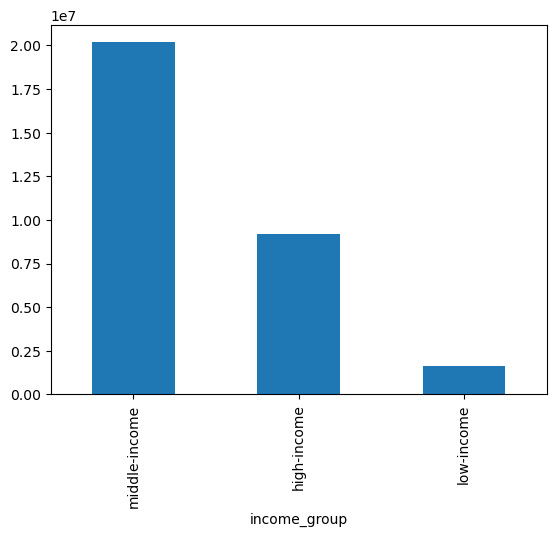

In [27]:
# Income Profile Visualization Horizontal Bar Chart
bar_income_group = df_IC_New['income_group'].value_counts().plot.bar()

In [28]:
# Export income_group Bar Chart
bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10', 'bar_income_group.png'))

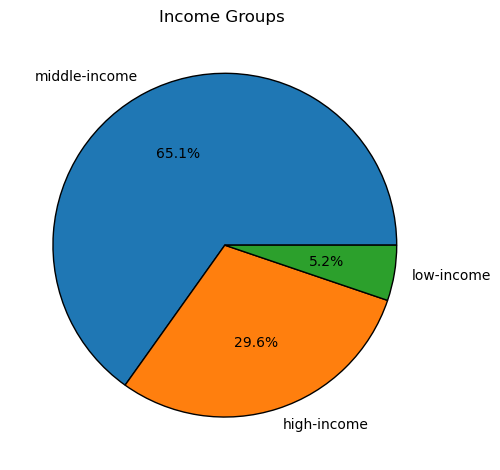

In [29]:
# Income Profile Visualization Pie Chart
income_group_counts = df_IC_New['income_group'].value_counts()
income_group_pie_chart=income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Groups ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [30]:
# Export income_group pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10', 'pie_chart_income_group.png'))

### 2. Age Profile

In [31]:
# Create an age group variable
df_IC_New.loc[df_IC_New['age'] <= 25, 'age_group'] = 'young adult'
df_IC_New.loc[(df_IC_New['age'] > 25) & (df_IC_New['age'] <= 44), 'age_group'] = 'adult'
df_IC_New.loc[(df_IC_New['age'] > 44) & (df_IC_New['age'] <= 64), 'age_group'] = 'middle-aged'
df_IC_New.loc[df_IC_New['age'] > 64, 'age_group'] = 'senior'

In [32]:
# Check value counts for each age group
age_group_counts = df_IC_New['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

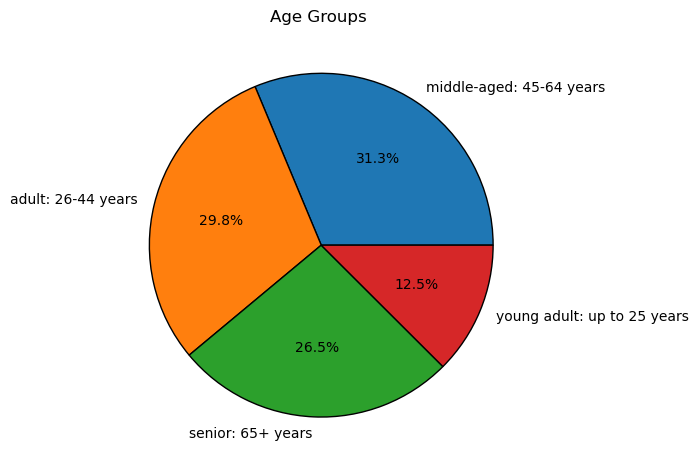

In [33]:
# Age Profile Visualization Pie Chart
age_group_pie_chart=age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'],wedgeprops={'edgecolor':'black'})
plt.title('Age Groups ')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [34]:
# Export age_groups pie Chart
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10', 'pie_chart_age_group.png'))

#### 2.1. Comapring Loyalty in differents age groups

In [35]:
# Crosstab loyalty vs Age groups
cross_loyalty_age= pd.crosstab(df_IC_New ['loyalty_flag'], df_IC_New ['age_group'],dropna=False)
cross_loyalty_age

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,3048175,3231509,2723958,1280451
New customer,1420508,1506670,1276659,599858
Regular customer,4745768,4951872,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

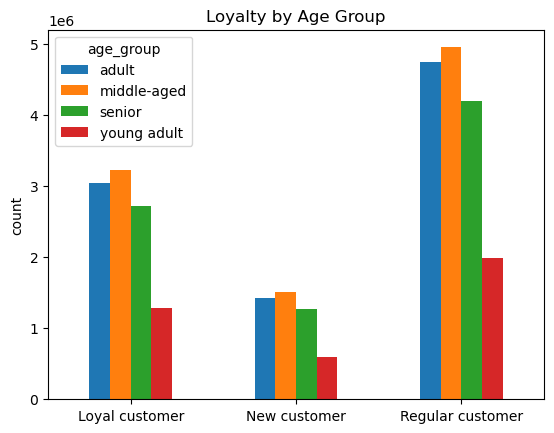

In [36]:
# bar chart loyalty vs age groups
bar_loyalty_age = cross_loyalty_age.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [37]:
# Export bar chart
bar_loyalty_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task_4.10','bar_loyalty_age_group.png'))

#### 2.2. Comapring Spending in differents age groups

In [38]:
# Crosstab spending vs age groups
cross_spending_age = pd.crosstab(df_IC_New['spending_flag'], df_IC_New['age_group'], dropna = False)
cross_spending_age

age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,174740,197797,156886,74002
Low spender,9039711,9492254,8038658,3790516


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

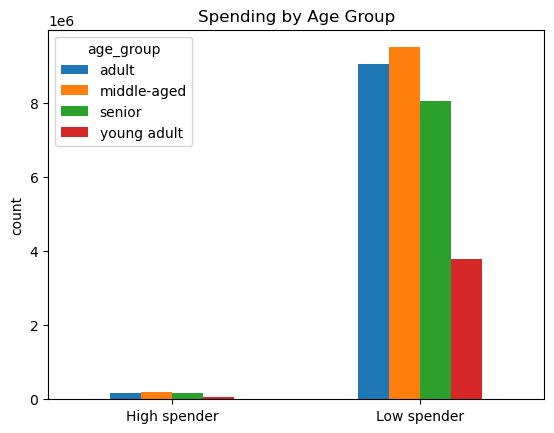

In [39]:
# bar chart Spending vs age groups
bar_spending_age = cross_spending_age.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [40]:
# Export bar chart
bar_spending_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task_4.10','bar_spending_age_group.png'))

#### 2.3. Comapring order-frequency in differents age groups

In [41]:
# Crosstab order_frequency vs age groups
cross_order_age = pd.crosstab(df_IC_New['order_frequency_flag'], df_IC_New['age_group'], dropna = False)
cross_order_age

age_group,adult,middle-aged,senior,young adult
order_frequency_flag,,,,
Frequent Customer,6309385,6610186,5630976,2653929
Non_frequent customer,848176,928228,760132,358439
Regular customer,2056890,2151637,1804436,852150


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent Customer'),
  Text(1, 0, 'Non_frequent customer'),
  Text(2, 0, 'Regular customer')])

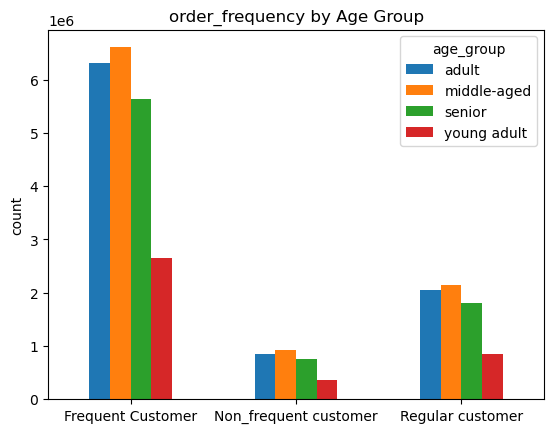

In [42]:
# bar chart order_frequency vs age groups
bar_order_frequency_age = cross_order_age.plot.bar()
plt.title('order_frequency by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [43]:
# Export bar chart
bar_order_frequency_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task_4.10','bar_order_frequency_age_group.png'))

### 3. Number of dependents Profile

In [44]:
# Create a dependents flag
df_IC_New.loc[df_IC_New['number_of_dependants'] == 0, 'dependents_flag'] = 'No dependents'
df_IC_New.loc[df_IC_New['number_of_dependants'] >= 1, 'dependents_flag'] = 'Has dependents'

In [45]:
# Check value counts
dependent_counts = df_IC_New['dependents_flag'].value_counts(dropna = False)
dependent_counts

dependents_flag
Has dependents    23224883
No dependents      7739681
Name: count, dtype: int64

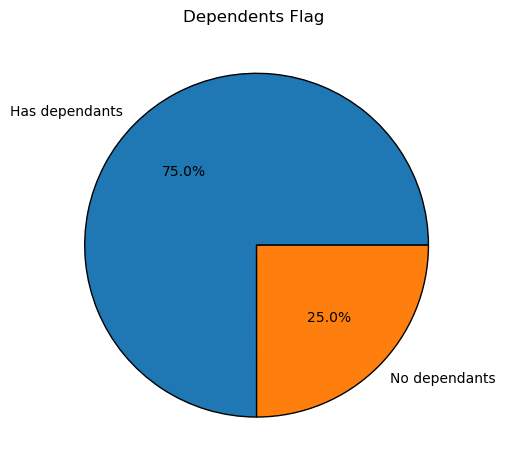

In [46]:
# number of dependents Profile Visualization Pie Chart
dependents_pie_chart=dependent_counts.plot.pie(autopct='%1.1f%%', labels= ['Has dependants', 'No dependants'],wedgeprops={'edgecolor':'black'})
plt.title('Dependents Flag ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [47]:
# Export dpendents_flag pie Chart
dependents_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task_4.10', 'pie_chart_dependents_flag.png'))